In [2]:
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans

# 19. Histogram-based image segmentation

## 19.1 Manual Thresholding

Text(0.5, 1.0, 'histogram')

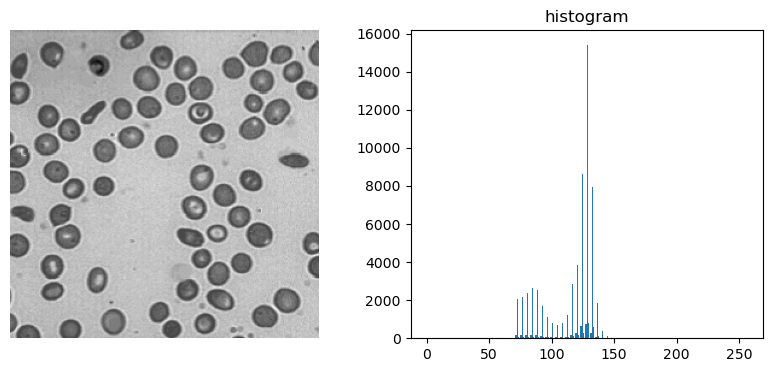

In [3]:
cells = imageio.imread('images/cells.bmp')

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cells, cmap='gray')
ax[0].axis('off')
ax[1].set_title('cells image')
ax[1].hist(cells.flatten(), 256, range=(0,256))
ax[1].set_title('histogram')

(-0.5, 255.5, 255.5, -0.5)

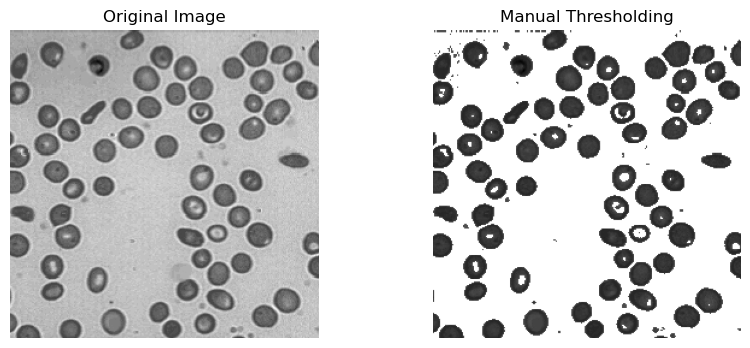

In [4]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(np.where(cells < 110, cells, 255), cmap='gray')
ax[1].set_title('Manual Thresholding')
ax[1].axis('off')

# 19.3 Grayscale image, $k = 2$ in one dimension

The objective is to binarize image `cells`, which is a grayscale image. The set $X$ is defined by $X = {I(p)}$,
for $p$ being the pixels of the image $I$.

Autothresholding : Research of the best threshold to sort into two classes

In [5]:
def threshold_auto(image):
    threshold = 0.5*(np.max(image)+np.min(image))
    done = False
    while not done:
        G1, G2 = (image >= threshold), (image < threshold)
        threshold_new = 0.5*(np.mean(image[G1])+np.mean(image[G2]))
        if abs(threshold_new-threshold) < 0.5 : 
            done = True
            return int(threshold_new)
        threshold = threshold_new
    

(-0.5, 255.5, 255.5, -0.5)

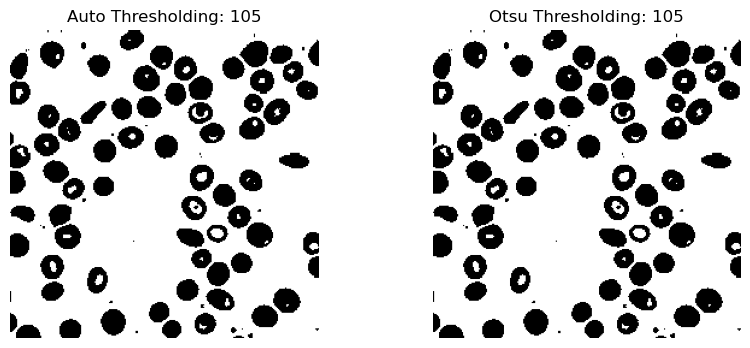

In [6]:
img1 = cells>threshold_auto(cells)
img2 = cells>threshold_otsu(cells)

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[0].set_title('Auto Thresholding: '+str(threshold_auto(cells)))
ax[1].set_title('Otsu Thresholding: '+str(threshold_otsu(cells)))
ax[0].axis('off')
ax[1].axis('off')

# 19.4 Simulation example, $k = 3$ in two dimensions

The objective is to generate a set of 2-D random points (within k = 3 distinct classes) and to apply the k-means
clustering for separating the points and evaluating the method (the classes are known!).

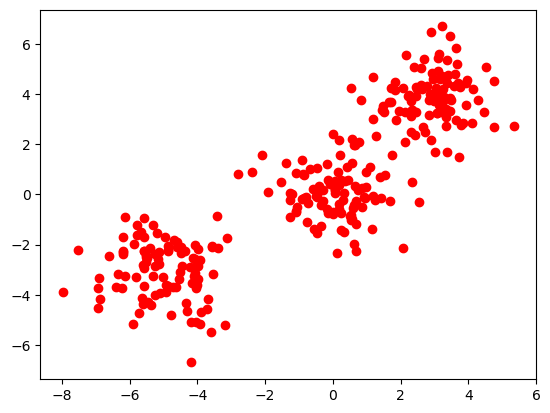

In [7]:
### Generation of 3 region of scattered points
def generation (n, x, y) :
    Y = np.random.randn(n, 2) + np.array([[x,y]])
    return Y
points1 = generation (100, 0, 0)
points2 = generation (100, 3,4)
points3 = generation (100, - 5, - 3)
pts=np.concatenate((points1,points2,points3))
plt.plot(pts[:,0], pts[:,1], 'ro')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


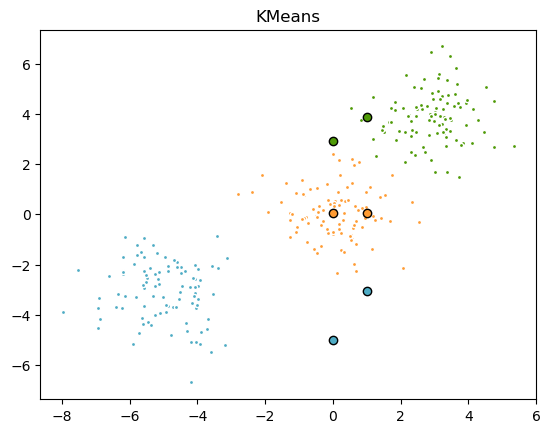

In [8]:
n = 3
kmeans = KMeans(n)
kmeans.fit(pts)

# plot
plt.figure()
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# k−means
# zip agregates values two by two
for k, col in zip(range(n) , colors ) :
    my_members = kmeans.labels_ == k
    cluster_center = kmeans.cluster_centers_[k]
    # display points
    plt.plot(pts[my_members, 0], pts[my_members, 1], 'w',markerfacecolor=col , marker='.')
    # display centroid
    plt.plot(kmeans.cluster_centers_[k], 'o' ,markerfacecolor=col , markeredgecolor='k', markersize=6)
plt.title ('KMeans')
plt.show()

# 19.4 Color image segmentation

Three different colors can be observed in the `image`. The objective is to separate the 3 colors with the help
of the K-means algorithm. Thus, the segmentation is performed in the RGB color space, and each pixel is
represented by a point in this 3D space.

Initialization steps are identical to previous code. The data is converted
from a color image (of size (n, m, 3)) to a vector (of size (n × m, 3)), done by the reshape function of numpy.

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1285.5, 965.5, -0.5)

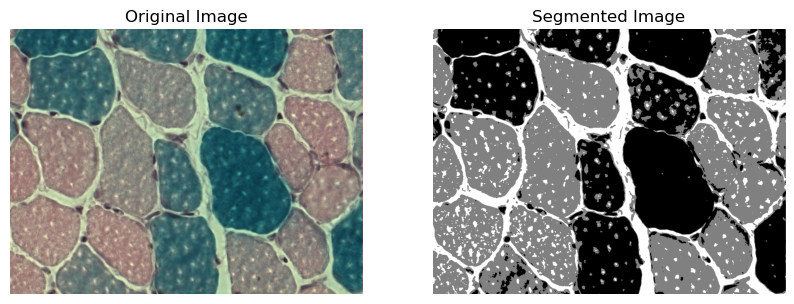

In [9]:
# Loading color image
tv16 = imageio.imread('images/Tv16.png')
nLines,nCols,channels = tv16.shape

# Reshaping data
data = np.reshape(tv16 , (nLines*nCols, channels))
kmeans.fit(data)

# Converting result to an image as we got labels , we expand the dynamic (multiply by 70)
segmentation = 70*np.reshape(kmeans.labels_ , (nLines, nCols))

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(tv16, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segmentation, 'gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

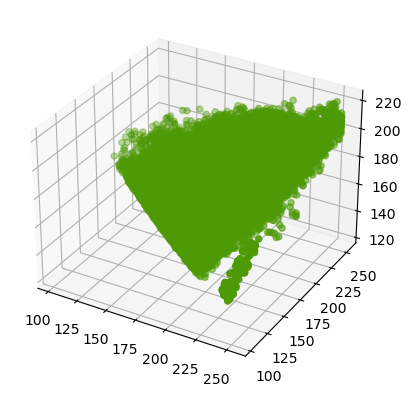

In [10]:
from mpl_toolkits.mplot3d import Axes3D # 3D scatter plot
# plot
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

# Plot scatter points
for k, col in zip (range(n) , colors ) :
    my_members = kmeans.labels_ == k
    cluster_center = kmeans.cluster_centers_[k]
ax.scatter (data[my_members, 0], data[my_members, 1], data[my_members, 2], c=col)
ax.scatter (cluster_center [0], cluster_center [1], cluster_center [2], s=30, c=col )